In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer
data=pd.read_csv('/content/household_power_consumption.csv')
data.replace(['?', 'nan', np.nan], -1, inplace=True)
data.isnull().sum()
data.ffill(axis=0,inplace=True)
p=data.drop('index',axis=1)
p=p.drop('Date',axis=1)
p=p.drop('Time',axis=1)
print(p)
# Feature Modification
p.replace(['?', 'nan', np.nan], -1, inplace=True)
numerical_features= ['Global_active_power', 'Global_reactive_power', 'Voltage',
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in numerical_features:
    p[i] = pd.to_numeric(p[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
p[numerical_features] = imp.fit_transform(p[numerical_features])
p.info()

# Creating Target Variable
eq1 =(p['Global_active_power']*1000/60)
eq2 = p['Sub_metering_1'] + p['Sub_metering_2'] + p['Sub_metering_3']
p['power_consumption'] = eq1 - eq2
p.head()
print(p)
features = p.drop('power_consumption', axis=1)
target = p['power_consumption']


       Global_active_power Global_reactive_power Voltage Global_intensity  \
0                     2.58                 0.136  241.97             10.6   
1                    2.552                   0.1  241.75             10.4   
2                     2.55                   0.1  241.64             10.4   
3                     2.55                   0.1  241.71             10.4   
4                    2.554                   0.1  241.98             10.4   
...                    ...                   ...     ...              ...   
260635                2.88                  0.36  239.01               12   
260636               2.892                 0.358  238.86             12.2   
260637               2.882                  0.28  239.05               12   
260638                2.66                  0.29  238.98             11.2   
260639               2.548                 0.354  239.25             10.6   

       Sub_metering_1 Sub_metering_2  Sub_metering_3  
0                   

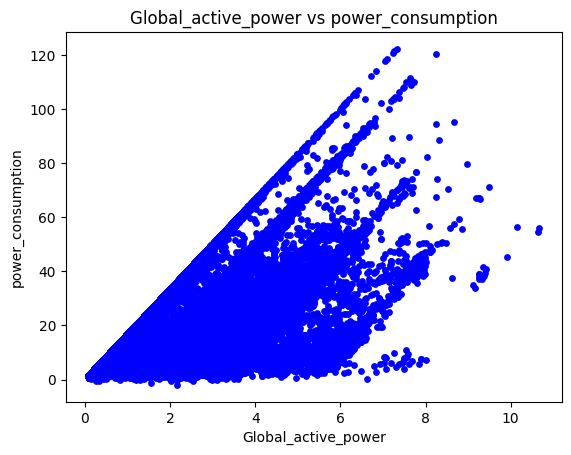

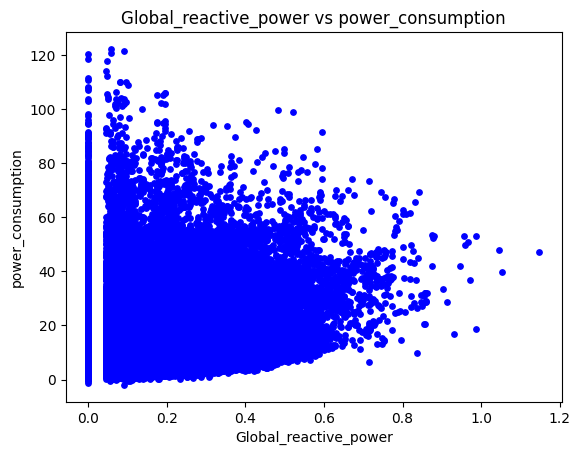

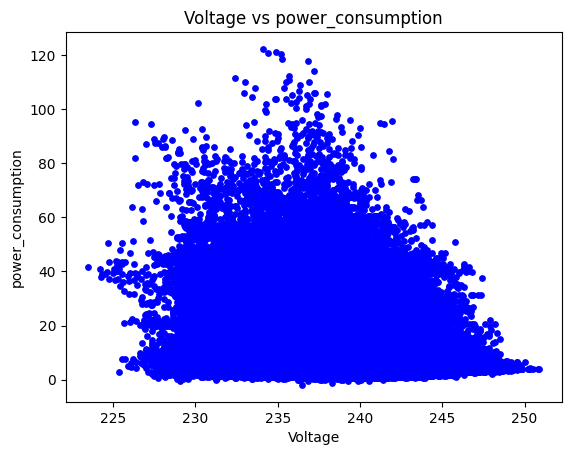

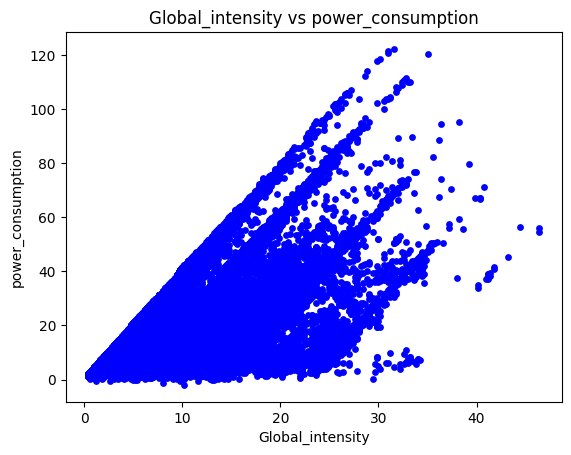

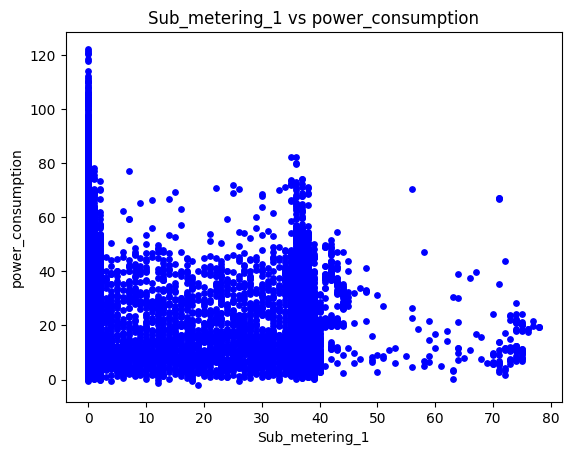

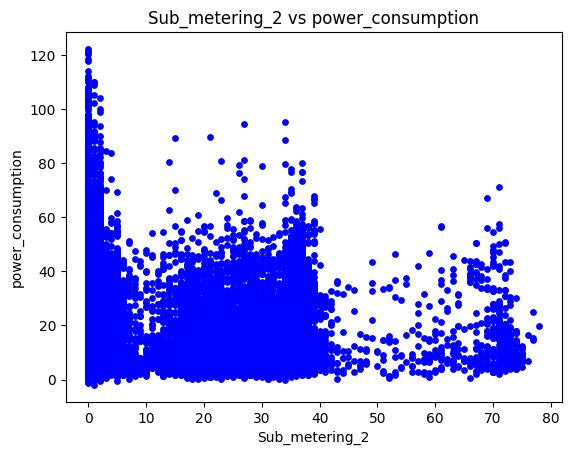

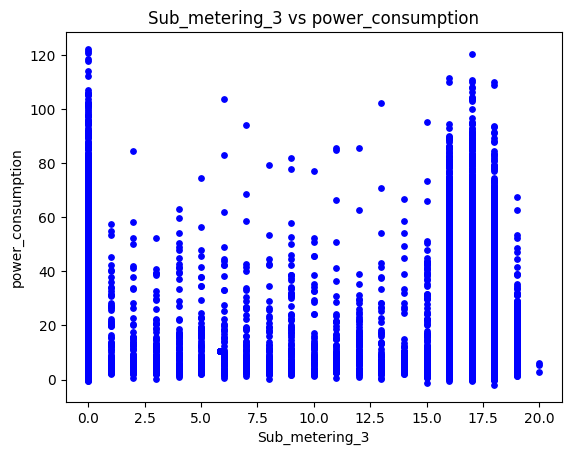

In [2]:
#plotting graphs
for feature in numerical_features:
    plt.scatter(features[feature],target,c='blue',s=15)
    plt.xlabel(feature)
    plt.ylabel('power_consumption')
    plt.title(f'{feature} vs power_consumption')
    plt.show()


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=13)


Equation is :
 y = 0.00000 + 1.36667 * Global_active_power + 176.46667 * Global_reactive_power + -0.00000 * Voltage + 0.00000 * Global_intensity + 0.00000 * Sub_metering_1 + -78.00000 * Sub_metering_2 + -78.00000 * Sub_metering_3


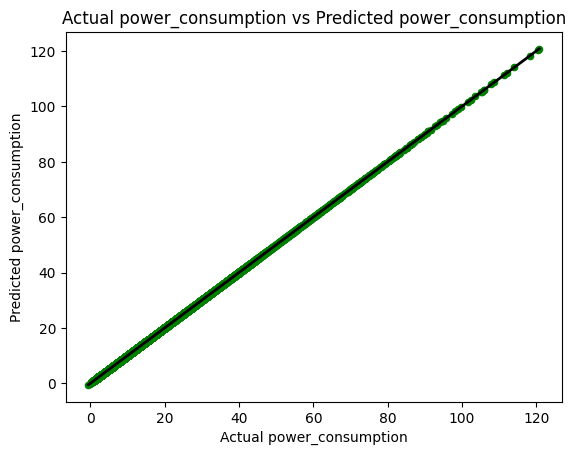

Mean Squared Error (MSE): 0.00000
Mean Absolute Error (MAE): 0.00000
Root Mean Squared Error (RMSE): 0.00000
Global_active_power0.6
Global_reactive_power:0.4
Voltage:0.5
 Global_intensity: 0.9
Sub_metering_1:0.2
Sub_metering_2:0.3
Sub_metering_3:0.1
Predicted power consumption for your features is: 64.88000


In [3]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=13)

#linear regression
def linear_regression(X, y):
    X_transpose = X.T
    coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return coefficients

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
y_train = y_train.to_numpy()

coefficients = linear_regression(X_train, y_train)

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
y_pred = X_test @ coefficients

intercept = 0.0
equation = f'y = {intercept:.5f}'
for feature, coeff in zip(features.columns, coefficients):
    equation += f' + {coeff:.5f} * {feature}'
print('Equation is :\n',equation)


plt.scatter(y_test, y_pred, c='green', s=20)
plt.xlabel('Actual power_consumption')
plt.ylabel('Predicted power_consumption')
plt.title('Actual power_consumption vs Predicted power_consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()


residuals = y_test - y_pred
mse = np.mean(residuals**2)
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")


Gap=float(input("Global_active_power"))
Grp = float(input("Global_reactive_power:"))
vol= float(input("Voltage:"))
Gl = float(input(" Global_intensity: "))
SM1 = float(input("Sub_metering_1:"))
SM2 = float(input("Sub_metering_2:"))
SM3= float(input("Sub_metering_3:"))



predicted_power_consumption = (
    intercept +
    coefficients[1] * Gap +
    coefficients[2] * Grp +
    coefficients[3] * vol +
    coefficients[4] * Gl +
    coefficients[5] * SM1+
    coefficients[6] * SM2 +
    coefficients[7] * SM3

)

print(f'Predicted power consumption for your features is: {predicted_power_consumption:.5f}')



In [4]:
#Support vector machine(SVM)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=23)


svr = SVR(kernel='linear')  #kernels = 'linear', 'rbf', 'poly'.


svr.fit(X_train, y_train)


y_pred = svr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n\n")



mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}\n\n")



rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}\n\n")


y_pred = svr.predict(X_test)






GAP= float(input("Enter Global_active_power: "))
GRP= float(input("Enter Global_reactive_power: "))
vol = float(input("Enter voltage: "))
G_int = float(input("Enter Global_intensity: "))
SM_1= float(input("Enter sub_metering_1: "))
SM_2= float(input("Enter sub_metering_2: "))
SM_3 = float(input("Enter sub_metering_3: "))


user_inputs_scaled = scaler.transform(np.array([[GAP,GRP,vol,G_int,SM_1,SM_2,SM_3]]))


predicted_consumption = svr.predict(user_inputs_scaled)[0]


print(f"Predicted consumption: {predicted_consumption:.2f}")


Mean Squared Error: 0.005221929594039869


Mean Absolute Error: 0.05153279760420933


Root Mean Squared Error: 0.07226291991083579


Enter Global_active_power: 0.6
Enter Global_reactive_power: 0.4
Enter voltage: 0.5
Enter Global_intensity: 0.9
Enter sub_metering_1: 0.2
Enter sub_metering_2: 0.3
Enter sub_metering_3: 0.1
Predicted consumption: 6.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
